# Objective : Price Prediction - On Second Hand Cars
# EDA - Python
# Insights - Patterns
#  Regression

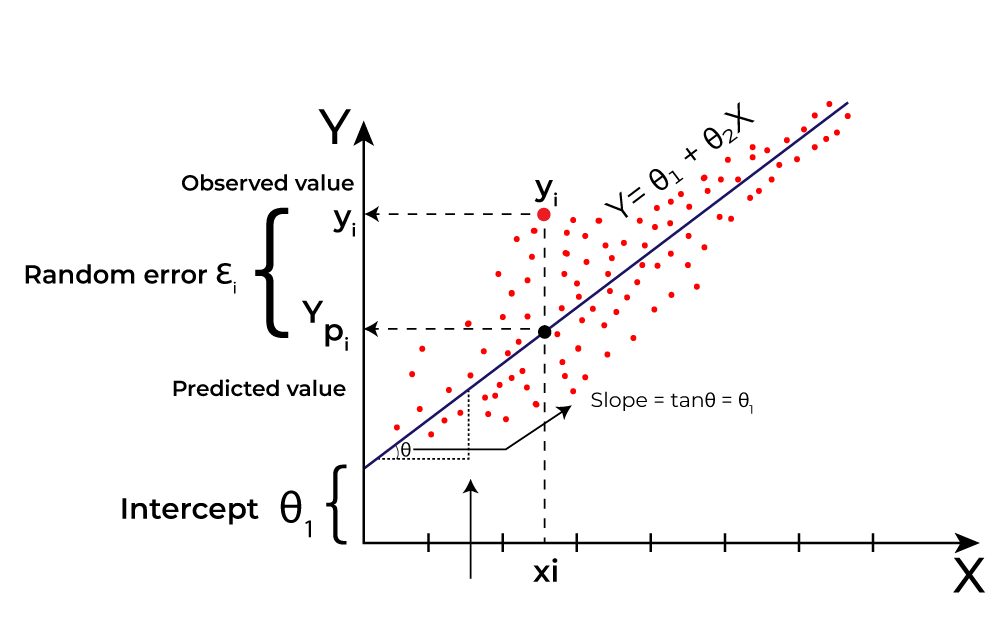

# 1. Import Python Modules

In [673]:
# Load necessary python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Lasso, Ridge,ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error,root_mean_squared_error
from sklearn.metrics import r2_score

# 2.  Load Cars Price Dataset

In [674]:
file_path = r"Cars-SecondHand.xlsx"
cars_price_df = pd.read_excel(file_path)
cars_price_df

,Brand,Price,Mileage,EngineV,Year
0,Mercedes-Benz,222000.0,1,6.3,2016
1,Mercedes-Benz,177000.0,1,5.5,2016
2,Mercedes-Benz,177777.0,1,5.5,2016
3,Mercedes-Benz,199999.0,1,5.5,2016
4,Mercedes-Benz,199999.0,1,5.5,2016
...,...,...,...,...,...
3998,Toyota,600.0,10,1.5,1979
3999,Mercedes-Benz,2990.0,300,2.8,1979
4000,Mercedes-Benz,2300.0,261,2.3,1978
4001,Mercedes-Benz,5500.0,440,2.0,1978


# 3. Basic Inspection on dataset

In [675]:
def basic_inspection_dataset(table):
    """Generates a basic inspection dataset from the given table."""
    
    print("top 5 rows - using head")
    print(table.head())
    print()
        
    print("bottom 5 rows using tail")
    print(table.tail())
    print()
        
    print("numbers of samples and columns")
    print(table.shape)
    print()
    
    print("numbers of samples ")
    print(len(table))
    print()
    
    print("numbers of entries in the data frame")
    print(table.size)
    print()
    
    print("Columns Names")
    print(table.columns)
    print()

    print("Columns dtypes")
    print(table.dtypes)
    print()
    
    print("Dataframe info")
    print(table.info())
    print()
    
    print()
    print("check the missing value in each column")
    print(table.isnull().sum())
          
    print()
    print("check the missing value in each column")
    print(table.isna().sum())
    
    print()
    print("table summary ")
    print(table.describe())

basic_inspection_dataset(cars_price_df)

top 5 rows - using head
           Brand     Price  Mileage  EngineV  Year
0  Mercedes-Benz  222000.0        1      6.3  2016
1  Mercedes-Benz  177000.0        1      5.5  2016
2  Mercedes-Benz  177777.0        1      5.5  2016
3  Mercedes-Benz  199999.0        1      5.5  2016
4  Mercedes-Benz  199999.0        1      5.5  2016

bottom 5 rows using tail
              Brand    Price  Mileage  EngineV  Year
3998         Toyota    600.0       10      1.5  1979
3999  Mercedes-Benz   2990.0      300      2.8  1979
4000  Mercedes-Benz   2300.0      261      2.3  1978
4001  Mercedes-Benz   5500.0      440      2.0  1978
4002  Mercedes-Benz  34999.0      150      2.8  1969

numbers of samples and columns
(4003, 5)

numbers of samples 
4003

numbers of entries in the data frame
20015

Columns Names
Index(['Brand', 'Price', 'Mileage', 'EngineV', 'Year'], dtype='object')

Columns dtypes
Brand       object
Price      float64
Mileage      int64
EngineV    float64
Year         int64
dtype: object

D

# 4. Handling Missing Values - Cat

In [676]:
# There is no missing values in cat columns

# 5. Categorical- Variable - Analysis -Using Pipeline

In [677]:
class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%0.2f%%', startangle=40)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()  
        
        

Brand frequency table
+---+---------------+-----------+
|   |     Class     | Frequency |
+---+---------------+-----------+
| 0 |  Volkswagen   |    875    |
| 1 | Mercedes-Benz |    820    |
| 2 |      BMW      |    636    |
| 3 |    Toyota     |    509    |
| 4 |    Renault    |    438    |
| 5 |     Audi      |    419    |
| 6 |  Mitsubishi   |    306    |
+---+---------------+-----------+
Brand Relative frequency table
+---+---------------+-----------+----------------------+
|   |     Class     | Frequency | Relative Frequency % |
+---+---------------+-----------+----------------------+
| 0 |  Volkswagen   |    875    |        21.86         |
| 1 | Mercedes-Benz |    820    |        20.48         |
| 2 |      BMW      |    636    |        15.89         |
| 3 |    Toyota     |    509    |        12.72         |
| 4 |    Renault    |    438    |        10.94         |
| 5 |     Audi      |    419    |        10.47         |
| 6 |  Mitsubishi   |    306    |         7.64         |
+--

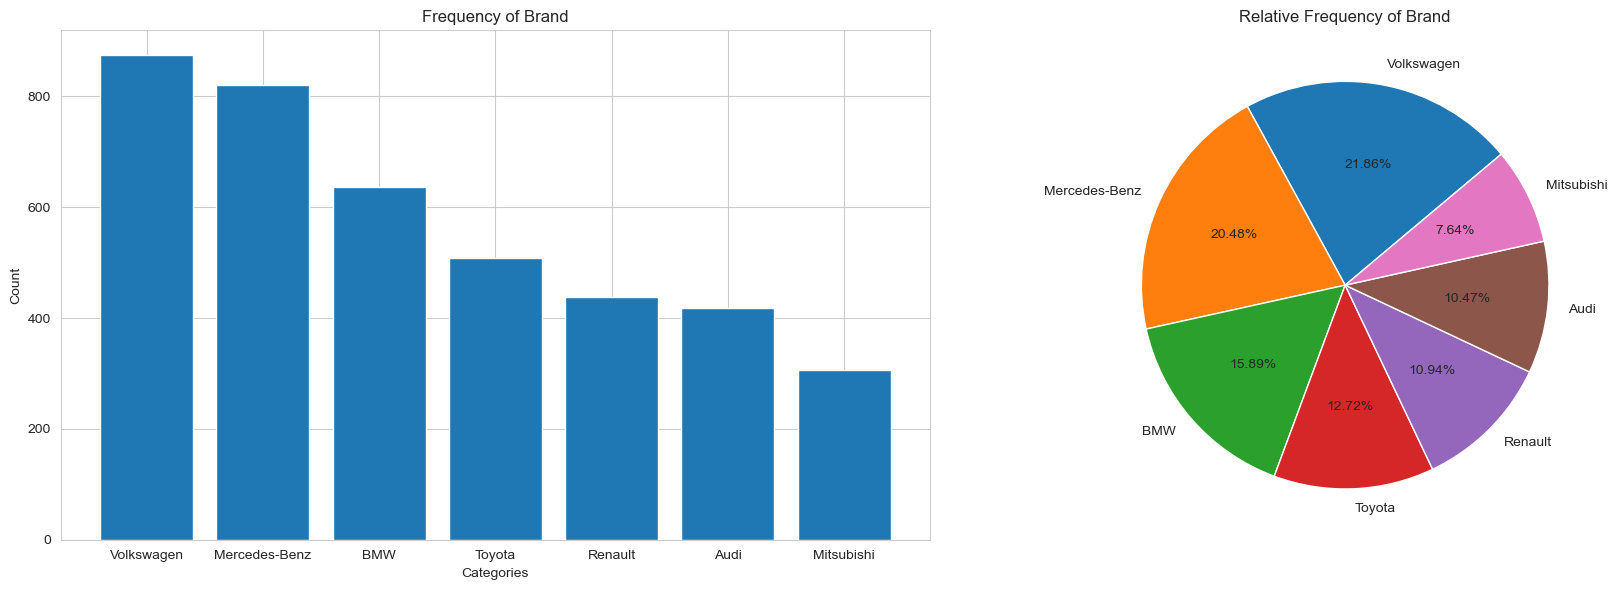

In [678]:
pipeline_cat_var = Pipeline([
    ('bar_pie_chart', BarPieChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(cars_price_df)

$Observations$
1. Volkswagen with highest numbers of sales with 875
2. Mitsubishi with lowest numbers of sales with 306

# 6. Handling Missing Values in Numerical Columns

In [679]:
# There is no missing values in num columns

# 7. Numerical - Variables - Analysis - Using -Pipeline

In [680]:
class HistBoxChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        num_cols = df.select_dtypes(exclude='object').columns
        for con_var in num_cols:
               
            
            # Create a figure and axes object
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))

            # Plot histogram without KDE on the left
            axes[0].hist(df[con_var], color='skyblue', edgecolor='black')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Frequency')
            axes[0].set_title(f'Histogram {con_var}')

            # Plot histogram with KDE on the right
            sns.histplot(data=df, x=con_var, kde=True, color='orange', edgecolor='black', ax=axes[1])
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')
            axes[1].set_title('Histogram with KDE')

            # Adjust layout
            plt.tight_layout()

            # Show the combined plot
            plt.show()
        


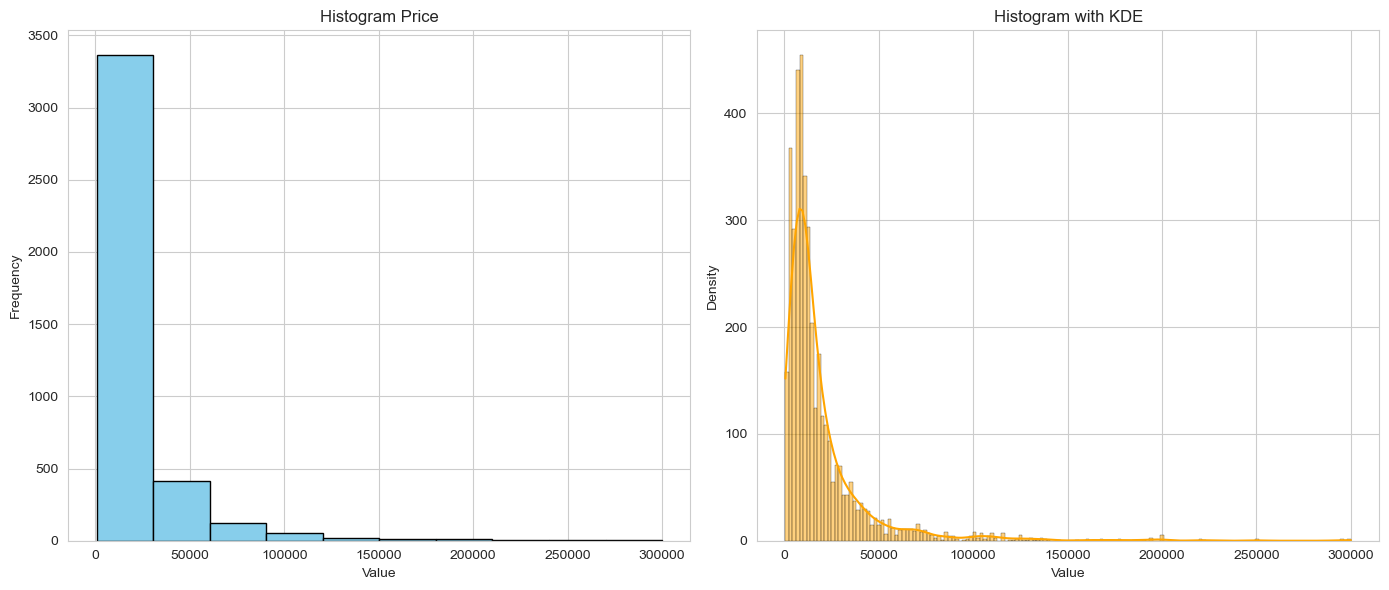

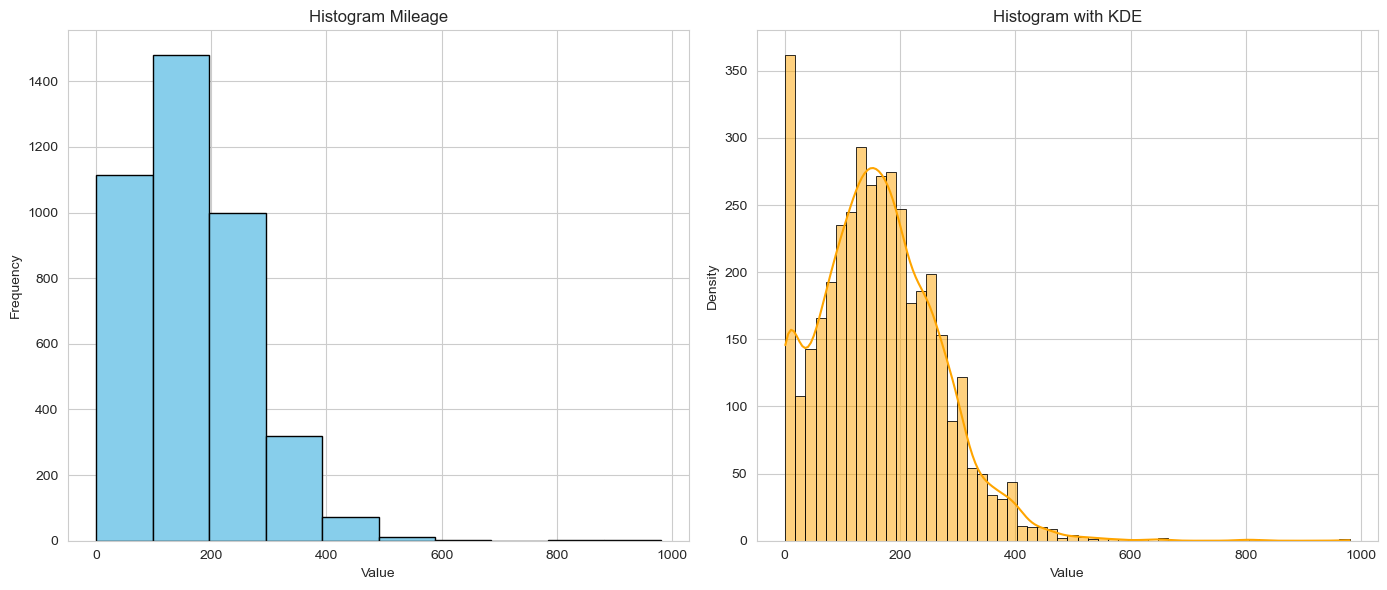

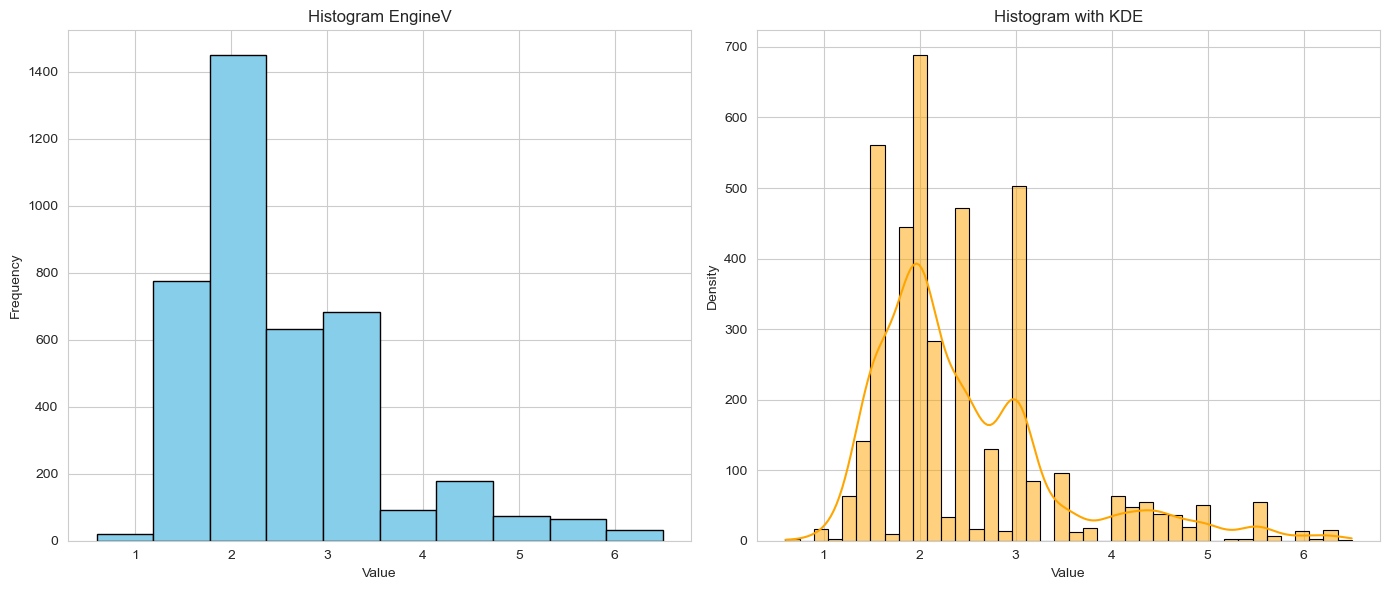

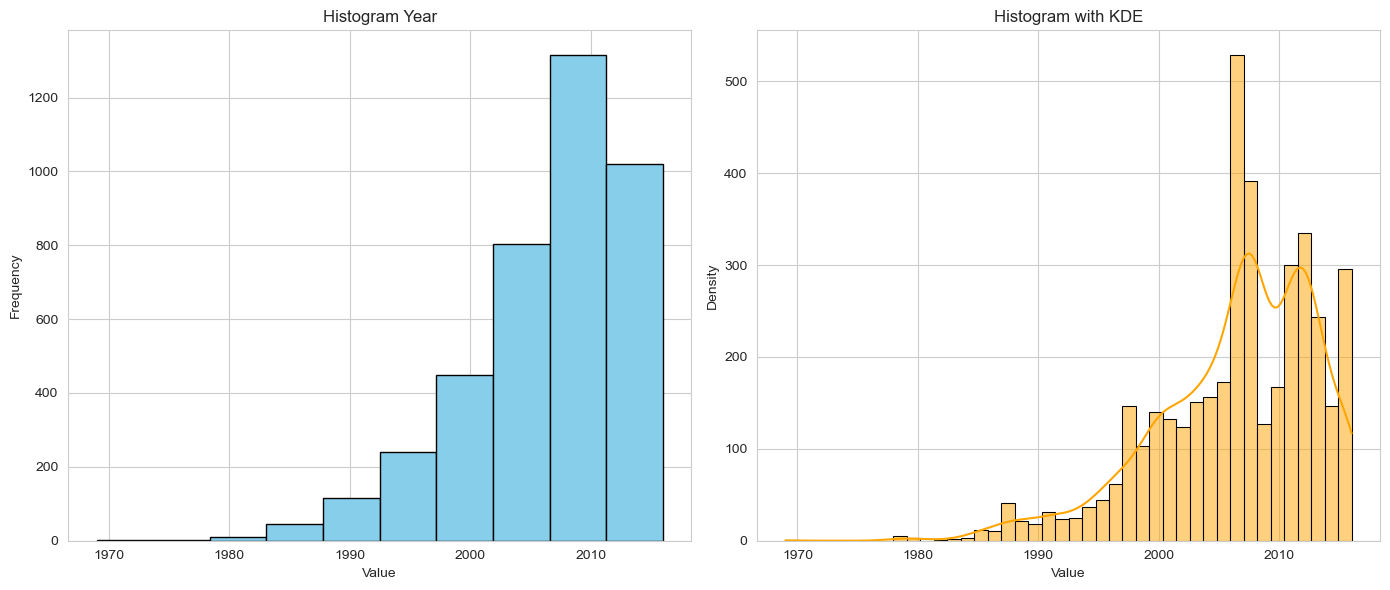

In [681]:
pipeline_num_var = Pipeline([
    ('hist_box_chart', HistBoxChartTransformer())
])

cars_price_num_df = cars_price_df[['Price', 'Mileage', 'EngineV', 'Year']]
# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(cars_price_num_df)

$Observations$
1. 'Price' , 'Mileage', 'EngineV', 'Year' are numberical columns
2. All are not normally distributed

 # 8. Numerical - Variables -Outliers Analysis

# 9. Bi Variate Analysis

## Cat Vs Num

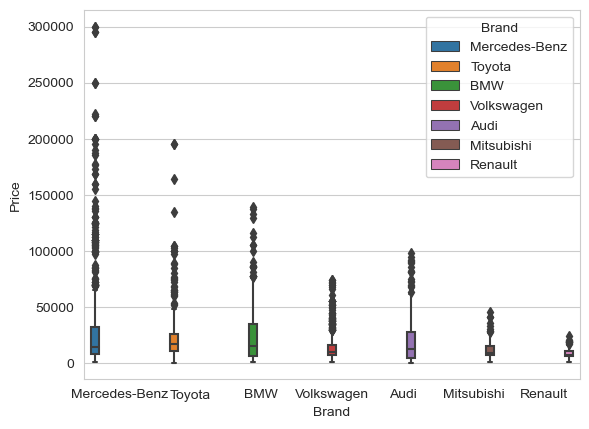

In [682]:
# Create a box plot with hue
sns.boxplot(x='Brand' ,y='Price', hue='Brand', data=cars_price_df)
# Show the plot
plt.show()

$Observations$
1. Mercedes-Benz with Highest price
2. Renault with lowest price
3. There are 7 brands are available in the data frame in Brand Column

## Num Vs Num

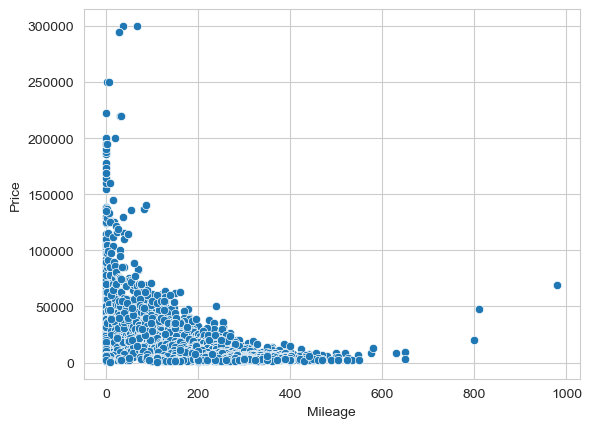

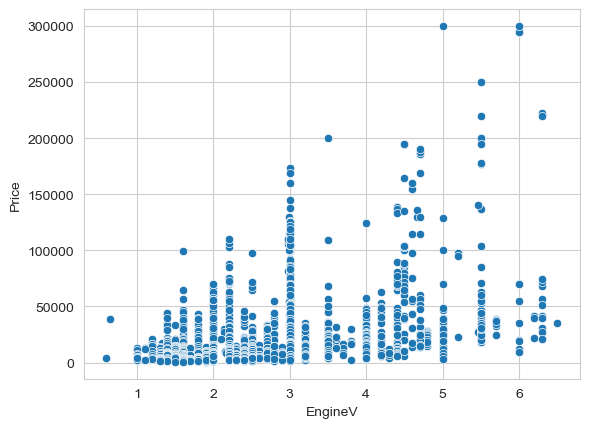

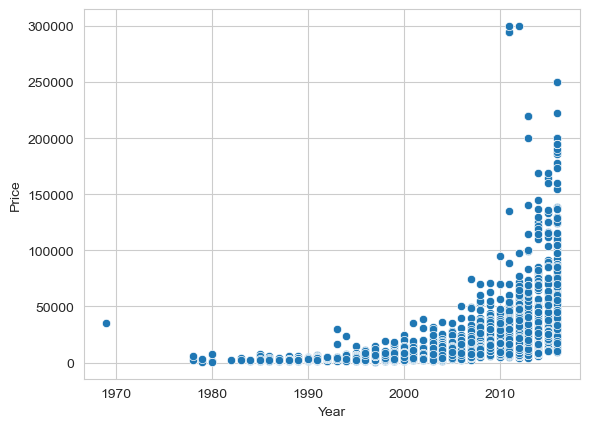

In [683]:
#print(cars_price_df.columns)
for num_var in [ 'Mileage', 'EngineV','Year']:
    sns.scatterplot(data=cars_price_df,y='Price',x=num_var)
    plt.show()

$Observations$
1. There is relationship b/w varaibles to price

In [684]:
 cars_price_df[['Price',  'Mileage', 'EngineV','Year']].corr()

,Price,Mileage,EngineV,Year
Price,1.000000,-0.473036,0.448590,0.485717
Mileage,-0.473036,1.000000,-0.034214,-0.664027
EngineV,0.448590,-0.034214,1.000000,0.038890
Year,0.485717,-0.664027,0.038890,1.000000


# 10. Data Transformation

In [685]:
cars_price_df["Mileage_log"]=np.log(cars_price_df["Mileage"])
cars_price_df["Price_log"]=np.log(cars_price_df["Price"])
cars_price_df["EngineV_log"]=np.log(cars_price_df["EngineV"])

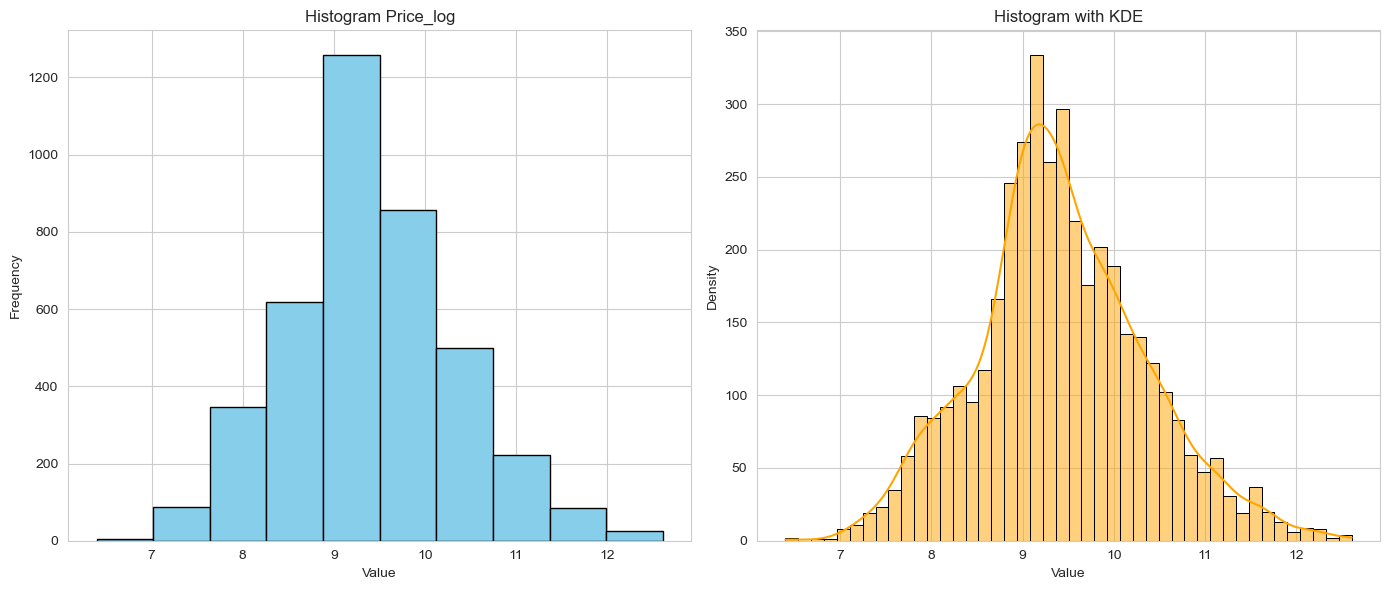

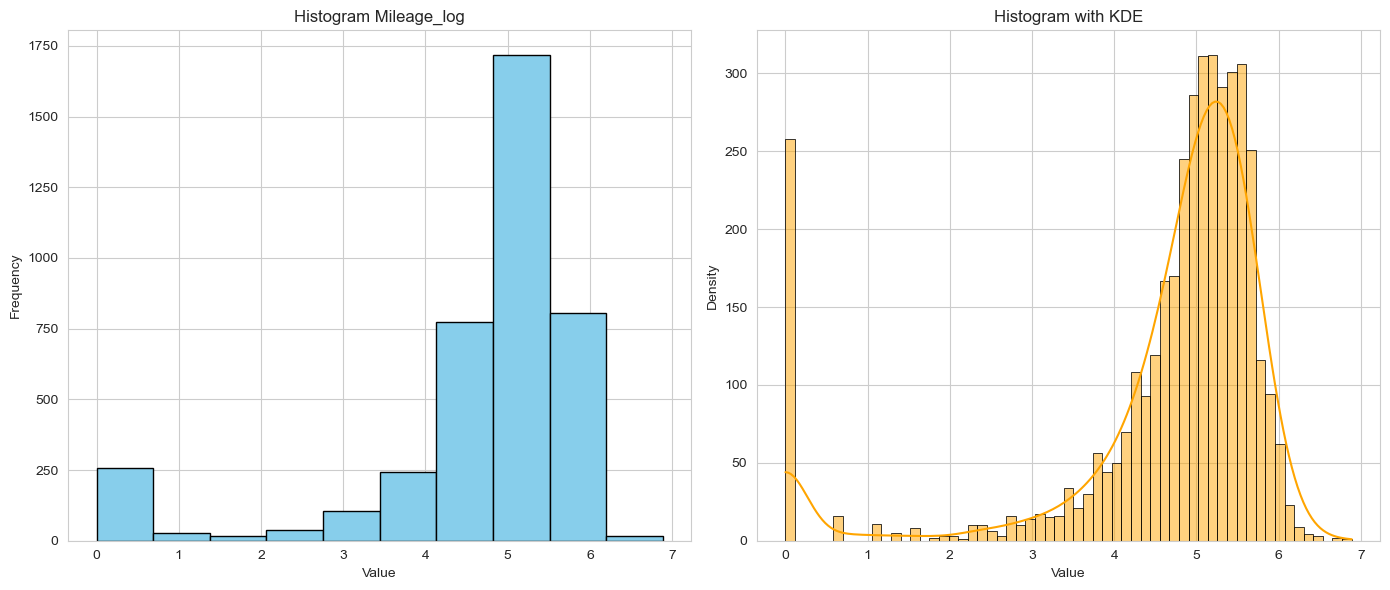

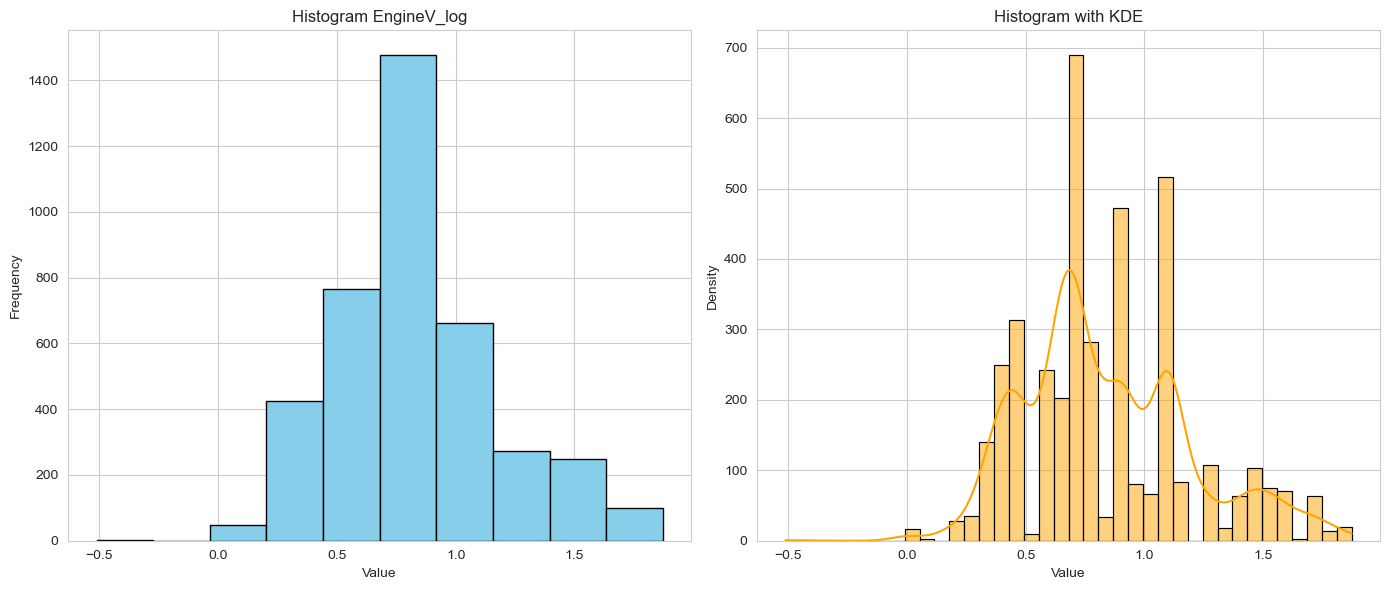

In [686]:
cars_price_num_df = cars_price_df[['Price_log', 'Mileage_log', 'EngineV_log']].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(cars_price_num_df)

In [687]:
cars_price_df["Mileage_sqrt"]=np.sqrt(cars_price_df["Mileage"])
cars_price_df["Price_sqrt"]=np.sqrt(cars_price_df["Price"])
cars_price_df["EngineV_sqrt"]=np.sqrt(cars_price_df["EngineV"])

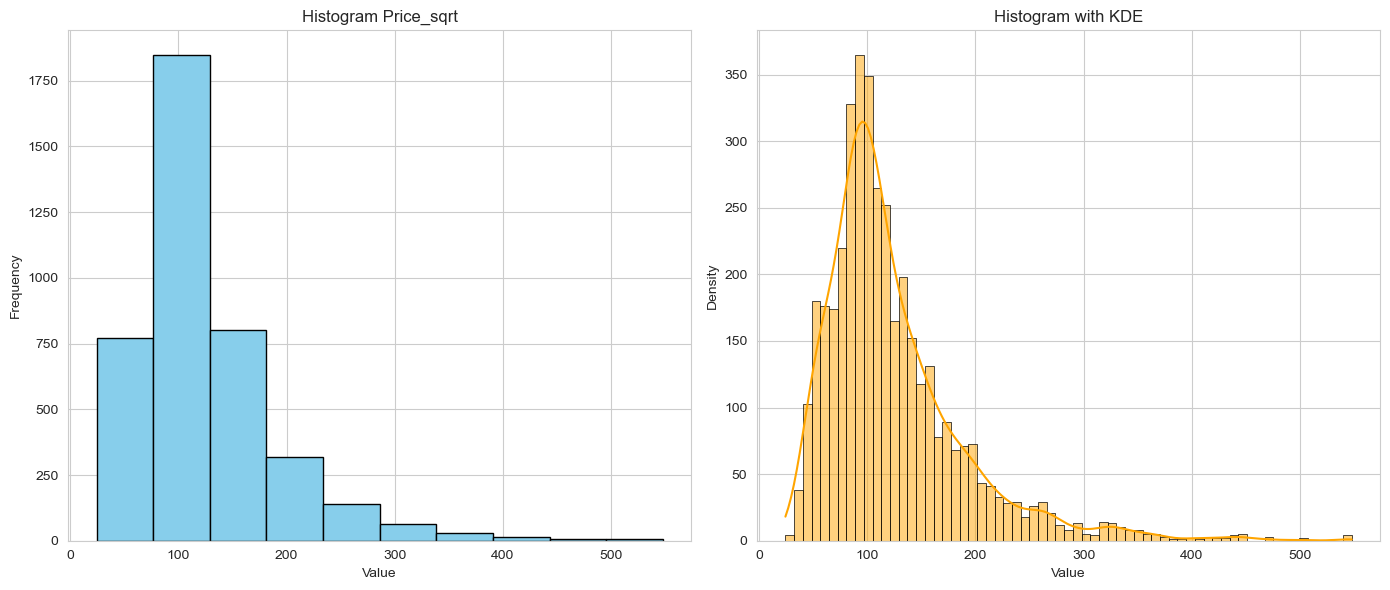

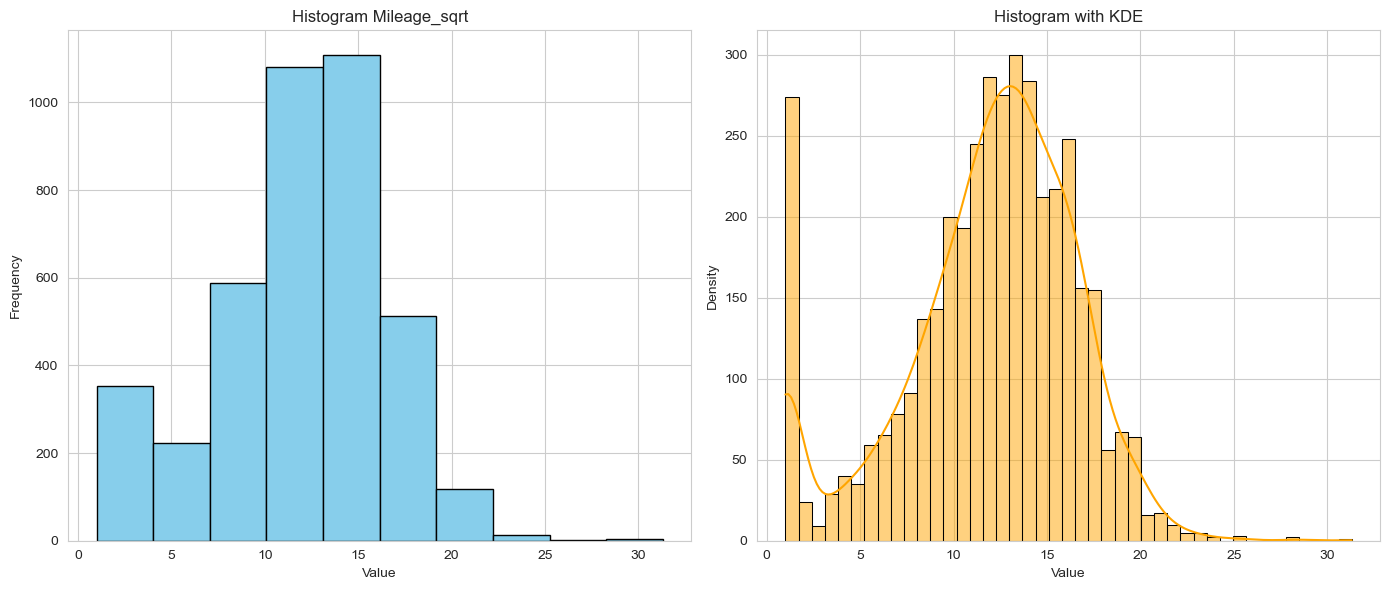

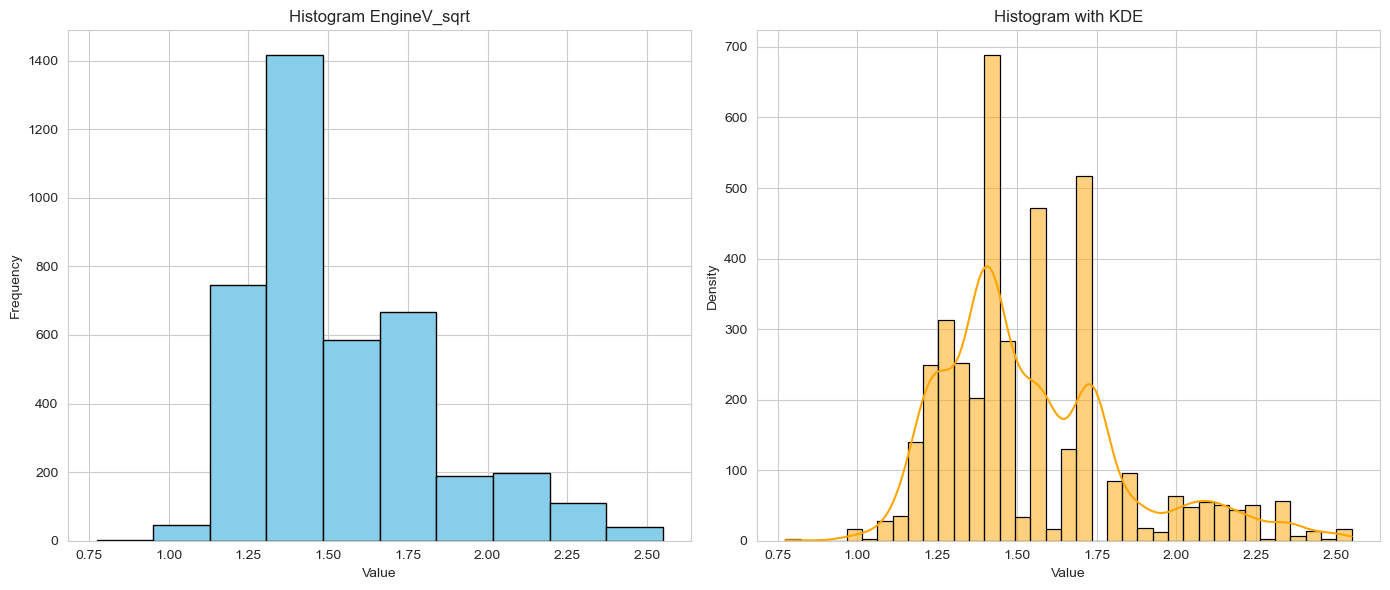

In [688]:
cars_price_num_df = cars_price_df[['Price_sqrt', 'Mileage_sqrt', 'EngineV_sqrt']].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(cars_price_num_df)

In [689]:
cars_price_df["Mileage_reci"]=1/(cars_price_df["Mileage"])
cars_price_df["Price_reci"]=1/(cars_price_df["Price"])
cars_price_df["EngineV_reci"]=1/(cars_price_df["EngineV"])

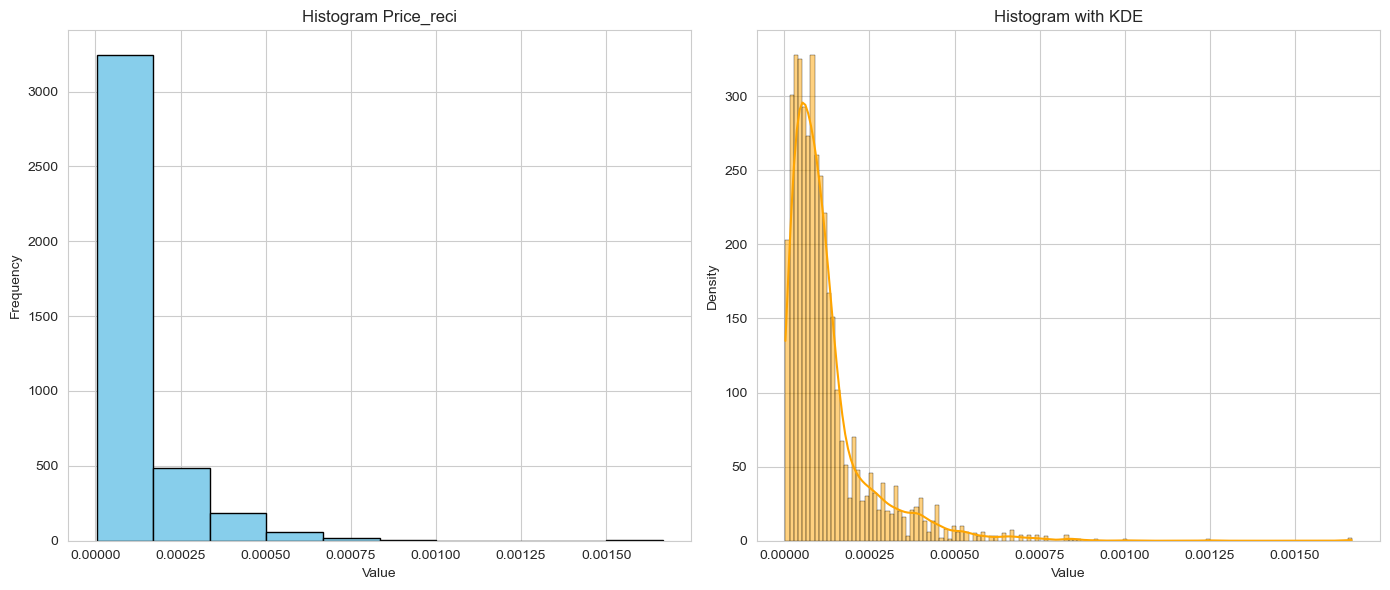

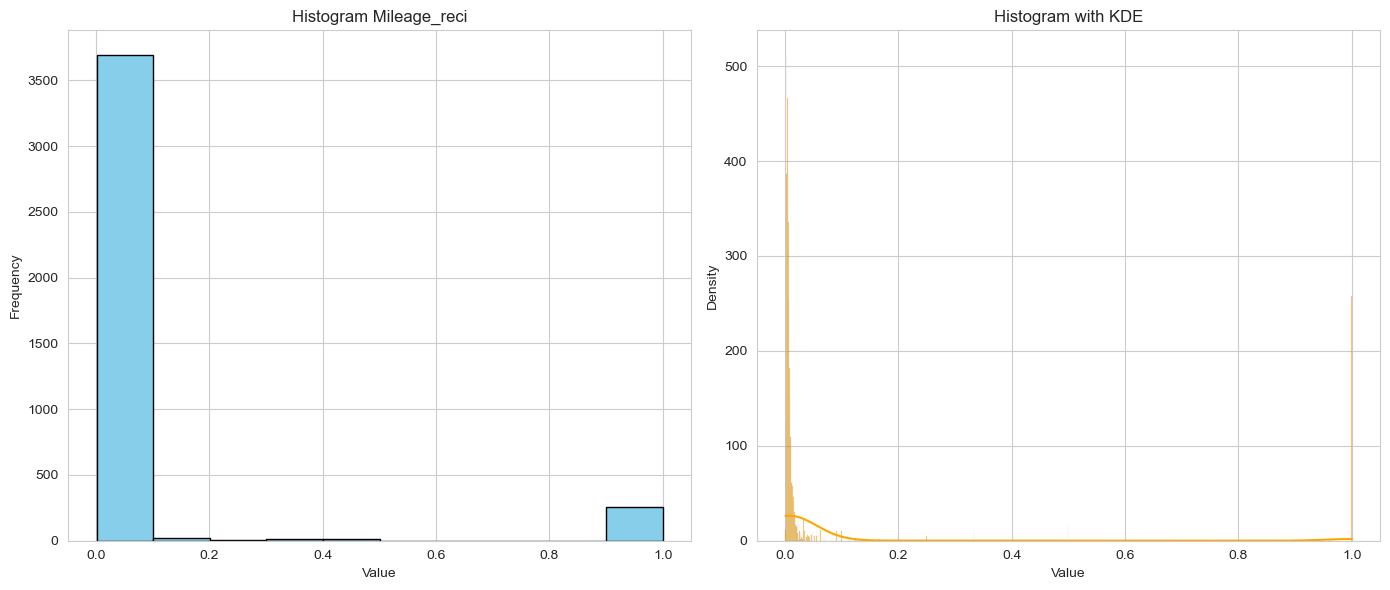

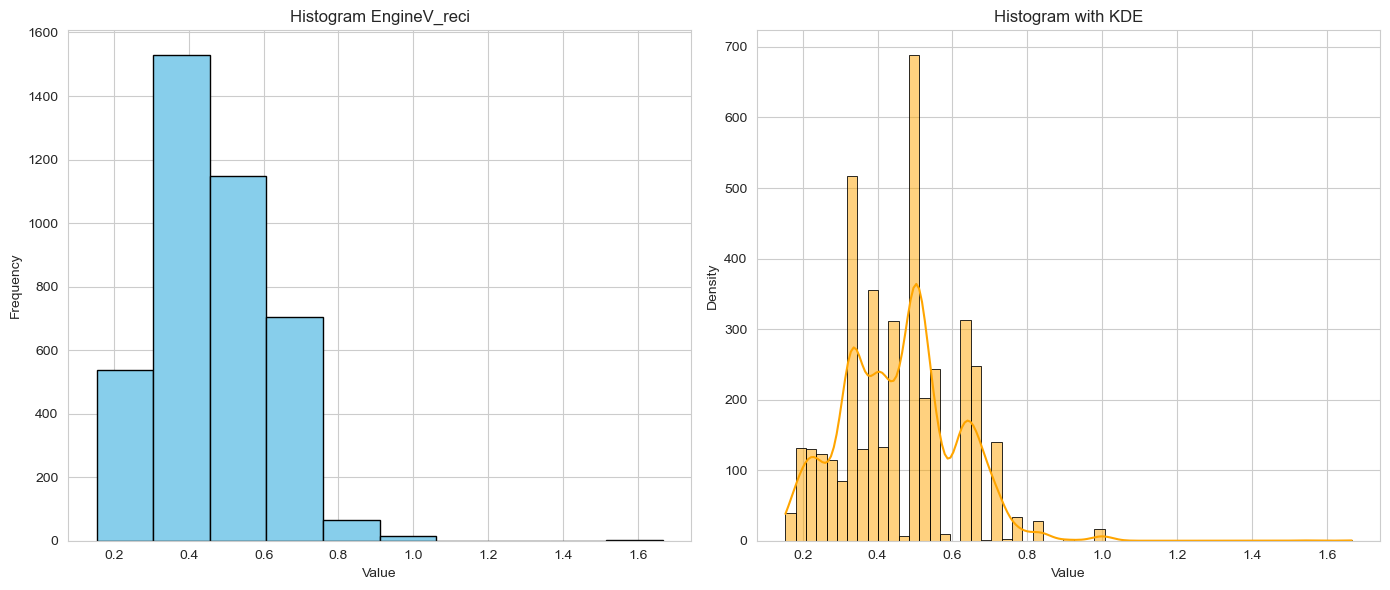

In [690]:
cars_price_num_df = cars_price_df[['Price_reci', 'Mileage_reci', 'EngineV_reci']].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(cars_price_num_df)

# 11. Standization - Normalization

In [691]:
cars_price_df[['Price_log','Mileage_sqrt','EngineV_reci']]

,Price_log,Mileage_sqrt,EngineV_reci
0,12.310433,1.000000,0.158730
1,12.083905,1.000000,0.181818
2,12.088285,1.000000,0.181818
3,12.206068,1.000000,0.181818
4,12.206068,1.000000,0.181818
...,...,...,...
3998,6.396930,3.162278,0.666667
3999,8.003029,17.320508,0.357143
4000,7.740664,16.155494,0.434783
4001,8.612503,20.976177,0.500000


In [692]:
scaler = StandardScaler()

# Fit and transform the scaler on the selected columns
scaled_columns = scaler.fit_transform(cars_price_df[['Price_log','Mileage_sqrt','EngineV_reci']])

# Replace the original columns with the scaled columns
cars_price_df[['Price_log_scaler', 'Mileage_sqrt_scaler','EngineV_reci_scaler']] = scaled_columns

print(cars_price_df)

              Brand     Price  Mileage  EngineV  Year  Mileage_log  Price_log  \
0     Mercedes-Benz  222000.0        1      6.3  2016     0.000000  12.310433   
1     Mercedes-Benz  177000.0        1      5.5  2016     0.000000  12.083905   
2     Mercedes-Benz  177777.0        1      5.5  2016     0.000000  12.088285   
3     Mercedes-Benz  199999.0        1      5.5  2016     0.000000  12.206068   
4     Mercedes-Benz  199999.0        1      5.5  2016     0.000000  12.206068   
...             ...       ...      ...      ...   ...          ...        ...   
3998         Toyota     600.0       10      1.5  1979     2.302585   6.396930   
3999  Mercedes-Benz    2990.0      300      2.8  1979     5.703782   8.003029   
4000  Mercedes-Benz    2300.0      261      2.3  1978     5.564520   7.740664   
4001  Mercedes-Benz    5500.0      440      2.0  1978     6.086775   8.612503   
4002  Mercedes-Benz   34999.0      150      2.8  1969     5.010635  10.463075   

      EngineV_log  Mileage_

In [693]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the selected column
scaled_column = scaler.fit_transform(cars_price_df[['Year']])

# Replace the original column with the scaled column
cars_price_df['Year_MinMax'] = scaled_column
print(cars_price_df)

              Brand     Price  Mileage  EngineV  Year  Mileage_log  Price_log  \
0     Mercedes-Benz  222000.0        1      6.3  2016     0.000000  12.310433   
1     Mercedes-Benz  177000.0        1      5.5  2016     0.000000  12.083905   
2     Mercedes-Benz  177777.0        1      5.5  2016     0.000000  12.088285   
3     Mercedes-Benz  199999.0        1      5.5  2016     0.000000  12.206068   
4     Mercedes-Benz  199999.0        1      5.5  2016     0.000000  12.206068   
...             ...       ...      ...      ...   ...          ...        ...   
3998         Toyota     600.0       10      1.5  1979     2.302585   6.396930   
3999  Mercedes-Benz    2990.0      300      2.8  1979     5.703782   8.003029   
4000  Mercedes-Benz    2300.0      261      2.3  1978     5.564520   7.740664   
4001  Mercedes-Benz    5500.0      440      2.0  1978     6.086775   8.612503   
4002  Mercedes-Benz   34999.0      150      2.8  1969     5.010635  10.463075   

      EngineV_log  Mileage_

In [694]:
cars_price_df[['Price_log_scaler', 'Mileage_sqrt_scaler','EngineV_reci_scaler','Year_MinMax']].describe()

,Price_log_scaler,Mileage_sqrt_scaler,EngineV_reci_scaler,Year_MinMax
count,4.003000e+03,4.003000e+03,4.003000e+03,4003.000000
mean,5.680082e-17,-5.680082e-17,-1.278018e-16,0.795653
std,1.000125e+00,1.000125e+00,1.000125e+00,0.142453
min,-3.233208e+00,-2.301687e+00,-2.032602e+00,0.000000
25%,-6.000318e-01,-5.059319e-01,-8.348595e-01,0.723404
50%,-6.794118e-02,1.464036e-01,-2.599454e-02,0.829787
75%,6.224600e-01,6.956878e-01,6.480596e-01,0.914894
max,3.427728e+00,4.110631e+00,8.062655e+00,1.000000


# 12. Convert Cat - to - Numerical Columns

In [695]:
cat_onehot_df = pd.get_dummies(cars_price_df['Brand'], prefix='Category', drop_first=False)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([cars_price_df, cat_onehot_df], axis=1)
df

,Brand,Price,Mileage,EngineV,Year,Mileage_log,Price_log,EngineV_log,Mileage_sqrt,Price_sqrt,...,Mileage_sqrt_scaler,EngineV_reci_scaler,Year_MinMax,Category_Audi,Category_BMW,Category_Mercedes-Benz,Category_Mitsubishi,Category_Renault,Category_Toyota,Category_Volkswagen
0,Mercedes-Benz,222000.0,1,6.3,2016,0.000000,12.310433,1.840550,1.000000,471.168760,...,-2.301687,-2.000010,1.000000,False,False,True,False,False,False,False
1,Mercedes-Benz,177000.0,1,5.5,2016,0.000000,12.083905,1.704748,1.000000,420.713679,...,-2.301687,-1.845941,1.000000,False,False,True,False,False,False,False
2,Mercedes-Benz,177777.0,1,5.5,2016,0.000000,12.088285,1.704748,1.000000,421.636099,...,-2.301687,-1.845941,1.000000,False,False,True,False,False,False,False
3,Mercedes-Benz,199999.0,1,5.5,2016,0.000000,12.206068,1.704748,1.000000,447.212477,...,-2.301687,-1.845941,1.000000,False,False,True,False,False,False,False
4,Mercedes-Benz,199999.0,1,5.5,2016,0.000000,12.206068,1.704748,1.000000,447.212477,...,-2.301687,-1.845941,1.000000,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3998,Toyota,600.0,10,1.5,1979,2.302585,6.396930,0.405465,3.162278,24.494897,...,-1.844164,1.389519,0.212766,False,False,False,False,False,True,False
3999,Mercedes-Benz,2990.0,300,2.8,1979,5.703782,8.003029,1.029619,17.320508,54.680892,...,1.151619,-0.675975,0.212766,False,False,True,False,False,False,False
4000,Mercedes-Benz,2300.0,261,2.3,1978,5.564520,7.740664,0.832909,16.155494,47.958315,...,0.905111,-0.157875,0.191489,False,False,True,False,False,False,False
4001,Mercedes-Benz,5500.0,440,2.0,1978,6.086775,8.612503,0.693147,20.976177,74.161985,...,1.925134,0.277330,0.191489,False,False,True,False,False,False,False


## VIF

In [696]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
# the independent variables set 
X = cars_price_df[['Mileage_sqrt_scaler','EngineV_reci_scaler','Year_MinMax']] 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

               feature       VIF
0  Mileage_sqrt_scaler  1.013955
1  EngineV_reci_scaler  1.001218
2          Year_MinMax  1.012732


In [697]:
df.columns

Index(['Brand', 'Price', 'Mileage', 'EngineV', 'Year', 'Mileage_log',
       'Price_log', 'EngineV_log', 'Mileage_sqrt', 'Price_sqrt',
       'EngineV_sqrt', 'Mileage_reci', 'Price_reci', 'EngineV_reci',
       'Price_log_scaler', 'Mileage_sqrt_scaler', 'EngineV_reci_scaler',
       'Year_MinMax', 'Category_Audi', 'Category_BMW',
       'Category_Mercedes-Benz', 'Category_Mitsubishi', 'Category_Renault',
       'Category_Toyota', 'Category_Volkswagen'],
      dtype='object')

In [698]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4003 entries, 0 to 4002
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   4003 non-null   object 
 1   Price                   4003 non-null   float64
 2   Mileage                 4003 non-null   int64  
 3   EngineV                 4003 non-null   float64
 4   Year                    4003 non-null   int64  
 5   Mileage_log             4003 non-null   float64
 6   Price_log               4003 non-null   float64
 7   EngineV_log             4003 non-null   float64
 8   Mileage_sqrt            4003 non-null   float64
 9   Price_sqrt              4003 non-null   float64
 10  EngineV_sqrt            4003 non-null   float64
 11  Mileage_reci            4003 non-null   float64
 12  Price_reci              4003 non-null   float64
 13  EngineV_reci            4003 non-null   float64
 14  Price_log_scaler        4003 non-null   

# 13. Inferential statistics test

In [699]:
for i in ['Category_Audi','Category_BMW','Category_Mercedes-Benz', 'Category_Mitsubishi', 'Category_Renault',
       'Category_Toyota', 'Category_Volkswagen']:
    df[i] = df[i].astype(int)

In [700]:
import statsmodels.api as sm
X = sm.add_constant(df[ ['Mileage_sqrt_scaler','EngineV_reci_scaler','Year_MinMax','Category_Audi', 'Category_BMW',       'Category_Mercedes-Benz', 'Category_Mitsubishi', 'Category_Renault',      'Category_Toyota','Category_Volkswagen']])

# Fit a linear regression model
model = sm.OLS(df['Price_log_scaler'], X)
results = model.fit()

# Print the regression results summary
print(results.summary())

# Calculate the R2 score
print(f"R2 score: {results.rsquared}")


                            OLS Regression Results                            
Dep. Variable:       Price_log_scaler   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     1792.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:27:29   Log-Likelihood:                -2443.4
No. Observations:                4003   AIC:                             4907.
Df Residuals:                    3993   BIC:                             4970.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3

$Observations$
- Durbin-Watson (1.560) - Since this is within the range of 1.5 and 2.5, we would consider autocorrelation not to be problematic in this regression model.

# 14. ML - Linear Regression Model

In [701]:
df

,Brand,Price,Mileage,EngineV,Year,Mileage_log,Price_log,EngineV_log,Mileage_sqrt,Price_sqrt,...,Mileage_sqrt_scaler,EngineV_reci_scaler,Year_MinMax,Category_Audi,Category_BMW,Category_Mercedes-Benz,Category_Mitsubishi,Category_Renault,Category_Toyota,Category_Volkswagen
0,Mercedes-Benz,222000.0,1,6.3,2016,0.000000,12.310433,1.840550,1.000000,471.168760,...,-2.301687,-2.000010,1.000000,0,0,1,0,0,0,0
1,Mercedes-Benz,177000.0,1,5.5,2016,0.000000,12.083905,1.704748,1.000000,420.713679,...,-2.301687,-1.845941,1.000000,0,0,1,0,0,0,0
2,Mercedes-Benz,177777.0,1,5.5,2016,0.000000,12.088285,1.704748,1.000000,421.636099,...,-2.301687,-1.845941,1.000000,0,0,1,0,0,0,0
3,Mercedes-Benz,199999.0,1,5.5,2016,0.000000,12.206068,1.704748,1.000000,447.212477,...,-2.301687,-1.845941,1.000000,0,0,1,0,0,0,0
4,Mercedes-Benz,199999.0,1,5.5,2016,0.000000,12.206068,1.704748,1.000000,447.212477,...,-2.301687,-1.845941,1.000000,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3998,Toyota,600.0,10,1.5,1979,2.302585,6.396930,0.405465,3.162278,24.494897,...,-1.844164,1.389519,0.212766,0,0,0,0,0,1,0
3999,Mercedes-Benz,2990.0,300,2.8,1979,5.703782,8.003029,1.029619,17.320508,54.680892,...,1.151619,-0.675975,0.212766,0,0,1,0,0,0,0
4000,Mercedes-Benz,2300.0,261,2.3,1978,5.564520,7.740664,0.832909,16.155494,47.958315,...,0.905111,-0.157875,0.191489,0,0,1,0,0,0,0
4001,Mercedes-Benz,5500.0,440,2.0,1978,6.086775,8.612503,0.693147,20.976177,74.161985,...,1.925134,0.277330,0.191489,0,0,1,0,0,0,0


In [702]:
df.columns

Index(['Brand', 'Price', 'Mileage', 'EngineV', 'Year', 'Mileage_log',
       'Price_log', 'EngineV_log', 'Mileage_sqrt', 'Price_sqrt',
       'EngineV_sqrt', 'Mileage_reci', 'Price_reci', 'EngineV_reci',
       'Price_log_scaler', 'Mileage_sqrt_scaler', 'EngineV_reci_scaler',
       'Year_MinMax', 'Category_Audi', 'Category_BMW',
       'Category_Mercedes-Benz', 'Category_Mitsubishi', 'Category_Renault',
       'Category_Toyota', 'Category_Volkswagen'],
      dtype='object')

In [703]:
df_final=df[['Price_log_scaler', 'Mileage_sqrt_scaler', 'EngineV_reci_scaler','Year_MinMax','Category_Audi',
        'Category_BMW', 'Category_Mercedes-Benz',
       'Category_Mitsubishi', 'Category_Renault', 'Category_Toyota',
       'Category_Volkswagen']].copy()

In [704]:
X=df_final.drop(['Price_log_scaler'],axis='columns')
Y=df_final['Price_log_scaler']

In [705]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)
print("train data length:",len(X_train))
print("test data length:",len(X_test))
X.columns

train data length: 2802
test data length: 1201


Index(['Mileage_sqrt_scaler', 'EngineV_reci_scaler', 'Year_MinMax',
       'Category_Audi', 'Category_BMW', 'Category_Mercedes-Benz',
       'Category_Mitsubishi', 'Category_Renault', 'Category_Toyota',
       'Category_Volkswagen'],
      dtype='object')

## 14.1 Linear Regression

In [706]:
def adjusted_r_squared(y_true, y_pred, n_samples, n_features):
    """
    Calculate the adjusted R-squared score.

    Parameters:
    - y_true: array-like, true target values
    - y_pred: array-like, predicted target values
    - n_samples: int, number of samples (observations)
    - n_features: int, number of features (predictors)

    Returns:
    - adjusted R-squared score
    """
    from sklearn.metrics import r2_score

    r_squared = r2_score(y_true, y_pred)
    adjusted_r_squared = 1 - (1 - r_squared) * ((n_samples - 1) / (n_samples - n_features - 1))
    
    return adjusted_r_squared


In [707]:
model_results = {}
def regression_matrix(model ,X_train,X_test,y_test, model_name):
    print("Model Name ",model_name)
    y_pred = model.predict(X_test)
    train_r2_score=round(model.score(X_train,y_train),3)
    print("train R2 Score:",train_r2_score)
    test_r2_score=round(model.score(X_test,y_test),3)
    print("Test R2 Score:",test_r2_score)
    print("Test R2 score:",r2_score(y_test,y_pred))
    
    mse = round(mean_squared_error(y_test,y_pred),3)
    print("MSE:",mse)
    rmse=round(root_mean_squared_error(y_test,y_pred),3)
    print("RMSE:",rmse)
    adj_r2_score=round(adjusted_r_squared(y_test,y_pred,len(y_test),len(X_train.columns)),3)
    print("Adj-R Score",adj_r2_score)
    
    if abs(train_r2_score - test_r2_score) > .10:
        print("model :" , model_name ,"is overfitting")
    if train_r2_score < 0.50:
        print("model :" , model_name ,"is underfitting")
    
    model_results[model_name]=[train_r2_score,test_r2_score,adj_r2_score,mse,rmse]
    

In [708]:
lr = LinearRegression()
lr.fit(X_train,y_train)


print("columns:",X_train.columns)
print('Coefficients: ', lr.coef_)
print('Intercept:',lr.intercept_)

regression_matrix(lr ,X_train,X_test,y_test, "LinearReg")


columns: Index(['Mileage_sqrt_scaler', 'EngineV_reci_scaler', 'Year_MinMax',
       'Category_Audi', 'Category_BMW', 'Category_Mercedes-Benz',
       'Category_Mitsubishi', 'Category_Renault', 'Category_Toyota',
       'Category_Volkswagen'],
      dtype='object')
Coefficients:  [-0.22326492 -0.34192724  4.47904151  0.08840969  0.20376792  0.2360728
 -0.19776409 -0.34402816  0.04875253 -0.03521068]
Intercept: -3.601050771858993
Model Name  LinearReg
train R2 Score: 0.801
Test R2 Score: 0.802
Test R2 score: 0.8019655813915846
MSE: 0.198
RMSE: 0.445
Adj-R Score 0.8


### Lasso Regression - L1 

In [709]:
lasso_reg = Lasso(alpha=0.1)  # Regularization strength (alpha) is set to 0.1
lasso_reg.fit(X_train,y_train)


print("columns:",X_train.columns)
print('Coefficients: ', lasso_reg.coef_)
print('Intercept:',lasso_reg.intercept_)

regression_matrix(lasso_reg ,X_train,X_test,y_test, "Lasso")

columns: Index(['Mileage_sqrt_scaler', 'EngineV_reci_scaler', 'Year_MinMax',
       'Category_Audi', 'Category_BMW', 'Category_Mercedes-Benz',
       'Category_Mitsubishi', 'Category_Renault', 'Category_Toyota',
       'Category_Volkswagen'],
      dtype='object')
Coefficients:  [-0.52381905 -0.32870942  0.         -0.          0.          0.
 -0.         -0.          0.         -0.        ]
Intercept: -0.005767345204190296
Model Name  Lasso
train R2 Score: 0.543
Test R2 Score: 0.523
Test R2 score: 0.5230581918786081
MSE: 0.477
RMSE: 0.69
Adj-R Score 0.519


### Ridge Regression -L2

In [710]:
ridge_reg = Ridge(alpha=0.1)  # Regularization strength (alpha) is set to 0.1
ridge_reg.fit(X_train,y_train)


print("columns:",X_train.columns)
print('Coefficients: ', ridge_reg.coef_)
print('Intercept:',ridge_reg.intercept_)

regression_matrix(ridge_reg ,X_train,X_test,y_test, "Ridge")

columns: Index(['Mileage_sqrt_scaler', 'EngineV_reci_scaler', 'Year_MinMax',
       'Category_Audi', 'Category_BMW', 'Category_Mercedes-Benz',
       'Category_Mitsubishi', 'Category_Renault', 'Category_Toyota',
       'Category_Volkswagen'],
      dtype='object')
Coefficients:  [-0.22453863 -0.34211698  4.46486991  0.08808107  0.20319201  0.23585121
 -0.1978099  -0.34313486  0.04880429 -0.03498381]
Intercept: -3.589760647603981
Model Name  Ridge
train R2 Score: 0.801
Test R2 Score: 0.802
Test R2 score: 0.8019940730490682
MSE: 0.198
RMSE: 0.445
Adj-R Score 0.8


### Elastic Net 

In [711]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio controls the balance between L1 and L2 penalties
elastic_net.fit(X_train,y_train)


print("columns:",X_train.columns)
print('Coefficients: ', elastic_net.coef_)
print('Intercept:',elastic_net.intercept_)

regression_matrix(elastic_net ,X_train,X_test,y_test, "ElasticNet")

columns: Index(['Mileage_sqrt_scaler', 'EngineV_reci_scaler', 'Year_MinMax',
       'Category_Audi', 'Category_BMW', 'Category_Mercedes-Benz',
       'Category_Mitsubishi', 'Category_Renault', 'Category_Toyota',
       'Category_Volkswagen'],
      dtype='object')
Coefficients:  [-0.53747638 -0.36223031  0.1125529  -0.          0.          0.
 -0.         -0.          0.         -0.        ]
Intercept: -0.09506601557307506
Model Name  ElasticNet
train R2 Score: 0.564
Test R2 Score: 0.545
Test R2 score: 0.5447469893310066
MSE: 0.455
RMSE: 0.674
Adj-R Score 0.541


## 14.2 Decision Tree Regression

In [712]:
# Create and fit the model
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
print("Model - Decision Tree Regression")

regression_matrix(model ,X_train,X_test,y_test, "DT")

Model - Decision Tree Regression
Model Name  DT
train R2 Score: 0.995
Test R2 Score: 0.77
Test R2 score: 0.7697407287057617
MSE: 0.23
RMSE: 0.48
Adj-R Score 0.768
model : DT is overfitting


## 14.3 Random Forest Regression

In [713]:
# Create and fit the model
model = RandomForestRegressor()
model.fit(X_train, y_train)
print("Model - Random Forest Regression")

regression_matrix(model ,X_train,X_test,y_test, "RandomForest")

Model - Random Forest Regression
Model Name  RandomForest
train R2 Score: 0.977
Test R2 Score: 0.874
Test R2 score: 0.8742761047836668
MSE: 0.126
RMSE: 0.354
Adj-R Score 0.873
model : RandomForest is overfitting


## 14.4 Support Vector Regression (SVR)

In [714]:
# Create and fit the model
model = SVR(kernel='linear')
model.fit(X_train, y_train)
print("Model - Support Vector Regression ")

regression_matrix(model ,X_train,X_test,y_test, "SVR")

Model - Support Vector Regression 
Model Name  SVR
train R2 Score: 0.797
Test R2 Score: 0.797
Test R2 score: 0.7965523943699108
MSE: 0.203
RMSE: 0.451
Adj-R Score 0.795


## 14.5 AdaBoost Regression

In [715]:
# Create and fit the model
ada_boost = AdaBoostRegressor()
ada_boost.fit(X_train, y_train)
print("Model - AdaBoost Regression ")

regression_matrix(ada_boost ,X_train,X_test,y_test, "AdaBoost")

Model - AdaBoost Regression 
Model Name  AdaBoost
train R2 Score: 0.797
Test R2 Score: 0.792
Test R2 score: 0.792339915983075
MSE: 0.208
RMSE: 0.456
Adj-R Score 0.791


## 14.6 Gradient Boosting Regression

In [716]:
# Create and fit the model
gradient_boost = GradientBoostingRegressor()
gradient_boost.fit(X_train, y_train)
print("Model - Gradient Boosting Regression")

regression_matrix(gradient_boost ,X_train,X_test,y_test, "GradientBoost")

Model - Gradient Boosting Regression
Model Name  GradientBoost
train R2 Score: 0.888
Test R2 Score: 0.876
Test R2 score: 0.8756880311105061
MSE: 0.124
RMSE: 0.352
Adj-R Score 0.875


## 14.7 XGBoost Regression

In [717]:
# Create and fit the model
xg_boost = xgb.XGBRegressor()
xg_boost.fit(X_train, y_train)
print("Model-XGBoost Regression")

regression_matrix(xg_boost ,X_train,X_test,y_test, "XGB")

Model-XGBoost Regression
Model Name  XGB
train R2 Score: 0.972
Test R2 Score: 0.86
Test R2 score: 0.860158345867159
MSE: 0.14
RMSE: 0.374
Adj-R Score 0.859
model : XGB is overfitting


## 18. Summary


In [718]:
print("\n\n")
result=pd.DataFrame(model_results,index=["Train R2","Test R2" ,"Adj R2","MSE","RMSE"])
print(result)
print("\n\n")

print(tabulate(result, headers='keys', tablefmt='pretty'))




          LinearReg  Lasso  Ridge  ElasticNet     DT  RandomForest    SVR  \
Train R2      0.801  0.543  0.801       0.564  0.995         0.977  0.797   
Test R2       0.802  0.523  0.802       0.545  0.770         0.874  0.797   
Adj R2        0.800  0.519  0.800       0.541  0.768         0.873  0.795   
MSE           0.198  0.477  0.198       0.455  0.230         0.126  0.203   
RMSE          0.445  0.690  0.445       0.674  0.480         0.354  0.451   

          AdaBoost  GradientBoost    XGB  
Train R2     0.797          0.888  0.972  
Test R2      0.792          0.876  0.860  
Adj R2       0.791          0.875  0.859  
MSE          0.208          0.124  0.140  
RMSE         0.456          0.352  0.374  



+----------+-----------+-------+-------+------------+-------+--------------+-------+----------+---------------+-------+
|          | LinearReg | Lasso | Ridge | ElasticNet |  DT   | RandomForest |  SVR  | AdaBoost | GradientBoost |  XGB  |
+----------+-----------+-------+-